<p style='font-size:150%'><i><u>Overview</u></i></p>

<p>In this practical we were required to write python code to fulfill the following requirements related to data analysis with pandas:
<p>    1. Check the consistency of the initial (raw) data.
<p>    2. In case of any inconsistencies, output refined data for further analysis.
<p>    3. Provide an executable Python script to automate the two steps above.
<p>    4. Implement unit tests to check at least some of the auxiliary functions.
<p>    5. Carry out certain data analysis and visualisation tasks.
<p>    6. Provide an executable Python script to regenerate all images and save them in a directory.
<p>    7. Provide a reproducible Jupyter notebook combining your report and data analysis.
<p>    8. Organise code with minimal duplication for its reuse in Jupyter notebook(s) and Python scripts.


In [1]:
import pandas as pd
import csv

In [2]:
df=pd.read_csv("../data/CometLanding.csv")

In [3]:
df

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
0,5.409304e+17,amika0078788556,RT @VersaTechnology: Congratulations @Philae20...,Fri Dec 05 18:07:14 +0000 2014,05/12/2014 18:07,NaN,en,NaN,NaN,1.297570e+09,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/3555068293...,425.0,113.0,http://twitter.com/amika0078788556/statuses/54...,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
1,5.409300e+17,ChrisDMarshall,CometWatch 2 December Â» Rosetta - ESA's comet...,Fri Dec 05 18:05:46 +0000 2014,05/12/2014 18:05,NaN,en,NaN,NaN,4.220121e+07,NaN,"<a href=""https://dev.twitter.com/docs/tfw"" rel...",http://pbs.twimg.com/profile_images/228087980/...,347.0,1286.0,http://twitter.com/ChrisDMarshall/statuses/540...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2,5.409300e+17,MHuuskoL,RT @EUCouncil: After the #CometLanding - Astro...,Fri Dec 05 18:05:36 +0000 2014,05/12/2014 18:05,NaN,en,NaN,NaN,5.744348e+08,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4973510588...,215.0,310.0,http://twitter.com/MHuuskoL/statuses/540929998...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
3,5.409293e+17,SaraGomezAranci,RT @EUCouncil: After the #CometLanding - Astro...,Fri Dec 05 18:03:00 +0000 2014,05/12/2014 18:03,NaN,fr,NaN,NaN,1.057356e+09,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/5391705804...,741.0,310.0,http://twitter.com/SaraGomezAranci/statuses/54...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
4,5.409292e+17,CBCDay6,RT @shaunmajumder: Feels good to be the @CBCDa...,Fri Dec 05 18:02:32 +0000 2014,05/12/2014 18:02,NaN,en,NaN,NaN,1.772769e+08,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/4590694303...,4331.0,2098.0,http://twitter.com/CBCDay6/statuses/5409292290...,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77314,5.324601e+17,ABForScience,This means that the actual landing will be ar...,Wed Nov 12 09:09:26 +0000 2014,12/11/2014 09:09,NaN,en,NaN,NaN,2.333123e+09,NaN,"<a href=""http://www.tweetcaster.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/4320695593...,155.0,212.0,http://twitter.com/ABForScience/statuses/53246...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77315,5.324601e+17,atieyK,RT @ObservingSpace: Weâ€™ve been waiting 10 ye...,Wed Nov 12 09:09:26 +0000 2014,12/11/2014 09:09,NaN,en,NaN,NaN,5.830372e+07,NaN,"<a href=""https://twitter.com/download/android""...",http://pbs.twimg.com/profile_images/5057311637...,354.0,1088.0,http://twitter.com/atieyK/statuses/53246014845...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
77316,5.324601e+17,j0nny5,RT @maxplanckpress: Accomazzo (flight director...,Wed Nov 12 09:09:26 +0000 2014,12/11/2014 09:09,NaN,en,NaN,NaN,1.791486e+07,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/89991673/j...,92.0,63.0,http://twitter.com/j0nny5/statuses/53246014825...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77317,5.324601e+17,nsentse,7 hours of waiting #CometLanding,Wed Nov 12 09:09:26 +0000 2014,12/11/2014 09:09,NaN,en,NaN,NaN,2.043400e+07,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/3693655850...,200.0,267.0,http://twitter.com/nsentse/statuses/5324601482...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."


In [4]:
len(df)

77319

In [ ]:
import sys
sys.path.append('../code')
import clean_data
df = clean_data.removeDuplicates(df)
len(df)

In [ ]:
mandatory_columns = ['id_str', 'from_user', 'text', 'created_at', 'time', 'user_lang', 'from_user_id_str', 
    'source', 'profile_image_url', 'user_followers_count', 'user_friends_count', 'status_url', 'entities_str']
df = clean_data.dropRowsWithEmptyFields(df, mandatory_columns)

In [ ]:
df

In [ ]:
columns = ['id_str', 'from_user_id_str', 'user_followers_count', 'user_friends_count', 'in_reply_to_user_id_str', 'in_reply_to_status_id_str']

In [ ]:
for cn in columns:
    df = clean_data.checkType(df, cn)
df = clean_data.checkDates(df)
clean_data.dropColumn(df, 'created_at')

In [ ]:
df

In [ ]:
clean_data.dropColumn(df, 'geo_coordinates')

In [ ]:
df

In [ ]:
df = clean_data.combineEng(df)

In [ ]:
clean_data.writeToCSV(df)

In [ ]:
import unittest
sys.path.append('../test')
import cleanTest

In [5]:
def suite():
    loader = unittest.TestLoader()
    testsuite = loader.loadTestsFromTestCase(cleanTest)
    return testsuite

In [6]:
def test():
    testsuite = suite()
    runner = unittest.TextTestRunner(sys.stdout, verbosity = 2)
    result = runner.run(testsuite)

In [ ]:
test()

In [ ]:
df=pd.read_csv("../data/CometLandingRefined.csv")

In [5]:
df.dtypes

id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates               object
user_lang                     object
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
status_url                    object
entities_str                  object
dtype: object

In [6]:
df.sort_values(by='time', ascending=True)

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,status_url,entities_str
1685,5.392087e+17,jorgerojas00,RT @UniversoCnocido: En una sola imagen todos ...,Mon Dec 01 00:05:43 +0000 2014,01/12/2014 00:05,NaN,es,NaN,NaN,2.225624e+08,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/3788000003...,212.0,372.0,http://twitter.com/jorgerojas00/statuses/53920...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1684,5.392089e+17,jorgerojas00,RT @UniversoCnocido: .@Philae2014 ya estÃ¡ seg...,Mon Dec 01 00:06:29 +0000 2014,01/12/2014 00:06,NaN,es,NaN,NaN,2.225624e+08,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/3788000003...,212.0,372.0,http://twitter.com/jorgerojas00/statuses/53920...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1683,5.392089e+17,x5_dc,"RT @ScienceNews: Good night, Philae. We may se...",Mon Dec 01 00:06:40 +0000 2014,01/12/2014 00:06,NaN,en,NaN,NaN,2.177027e+09,NaN,"<a href=""http://blackberry.com/twitter"" rel=""n...",http://pbs.twimg.com/profile_images/4720773348...,146.0,906.0,http://twitter.com/x5_dc/statuses/539208924105...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
1682,5.392089e+17,x5_dc,RT @SNStudents: This photo shows the primary l...,Mon Dec 01 00:06:44 +0000 2014,01/12/2014 00:06,NaN,en,NaN,NaN,2.177027e+09,NaN,"<a href=""http://blackberry.com/twitter"" rel=""n...",http://pbs.twimg.com/profile_images/4720773348...,146.0,906.0,http://twitter.com/x5_dc/statuses/539208940975...,"{""hashtags"":[{""text"":""67P"",""indices"":[99,103]}..."
1681,5.392091e+17,x5_dc,RT @ScienceNews: Philae lander sent in a surpr...,Mon Dec 01 00:07:12 +0000 2014,01/12/2014 00:07,NaN,en,NaN,NaN,2.177027e+09,NaN,"<a href=""http://blackberry.com/twitter"" rel=""n...",http://pbs.twimg.com/profile_images/4720773348...,146.0,906.0,http://twitter.com/x5_dc/statuses/539209059581...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,5.391996e+17,LukeGolds,Â¦ 693 Â¦ Philae touches down on the surface ...,Sun Nov 30 23:29:35 +0000 2014,30/11/2014 23:29,NaN,en,NaN,NaN,6.196297e+08,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",http://pbs.twimg.com/profile_images/2344739619...,345.0,NaN,http://twitter.com/LukeGolds/statuses/53919959...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
1688,5.391996e+17,LukeGolds,â™¦ 584 #cometlanding â™¦ comet landing â™...,Sun Nov 30 23:29:37 +0000 2014,30/11/2014 23:29,NaN,en,NaN,NaN,6.196297e+08,NaN,"<a href=""http://ifttt.com"" rel=""nofollow"">IFTT...",http://pbs.twimg.com/profile_images/2344739619...,345.0,NaN,http://twitter.com/LukeGolds/statuses/53919960...,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
1687,5.392013e+17,diuk37,RT @davidshukmanbbc: Interesting new take on #...,Sun Nov 30 23:36:25 +0000 2014,30/11/2014 23:36,NaN,en,NaN,NaN,1.483404e+08,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/4532615914...,224.0,544.0,http://twitter.com/diuk37/statuses/53920131224...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
1686,5.392047e+17,ben_economics,RT @rjmlaird: My @ESA_Rosetta t-shirts have ar...,Sun Nov 30 23:49:50 +0000 2014,30/11/2014 23:49,NaN,fr,NaN,NaN,3.442382e+08,NaN,"<a href=""http://www.twitter.com"" rel=""nofollow...",http://pbs.twimg.com/profile_images/5115941099...,288.0,444.0,http://twitter.com/ben_economics/statuses/5392...,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."


In [7]:
df['time']=pd.to_datetime(df['time'], dayfirst=True)

In [8]:
day=df.groupby(df['time'].dt.date)

In [9]:
day.size()

time
2014-11-12    73253
2014-11-26      400
2014-11-27      497
2014-11-28      711
2014-11-29      428
2014-11-30      343
2014-12-01      603
2014-12-02      475
2014-12-03      312
2014-12-04      205
2014-12-05       91
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

Graphs to show tweet activity over time.

First, a bar chart:

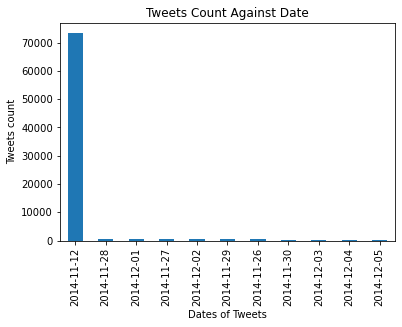

In [11]:
df['time'].dt.date.value_counts().plot(kind="bar").set(xlabel='Dates of Tweets', ylabel='Tweets count', title='Tweets Count Against Date')
plt.show()

Let's get a better look with a log scale:

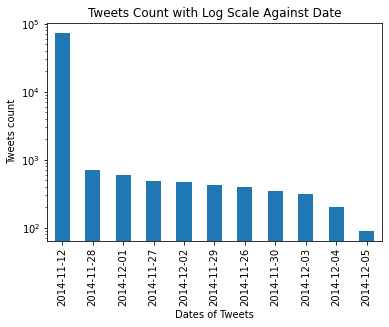

In [12]:
df['time'].dt.date.value_counts().plot(kind="bar").set(yscale='log', xlabel='Dates of Tweets', ylabel='Tweets count', title='Tweets Count with Log Scale Against Date')
plt.show()

Now a line graph:

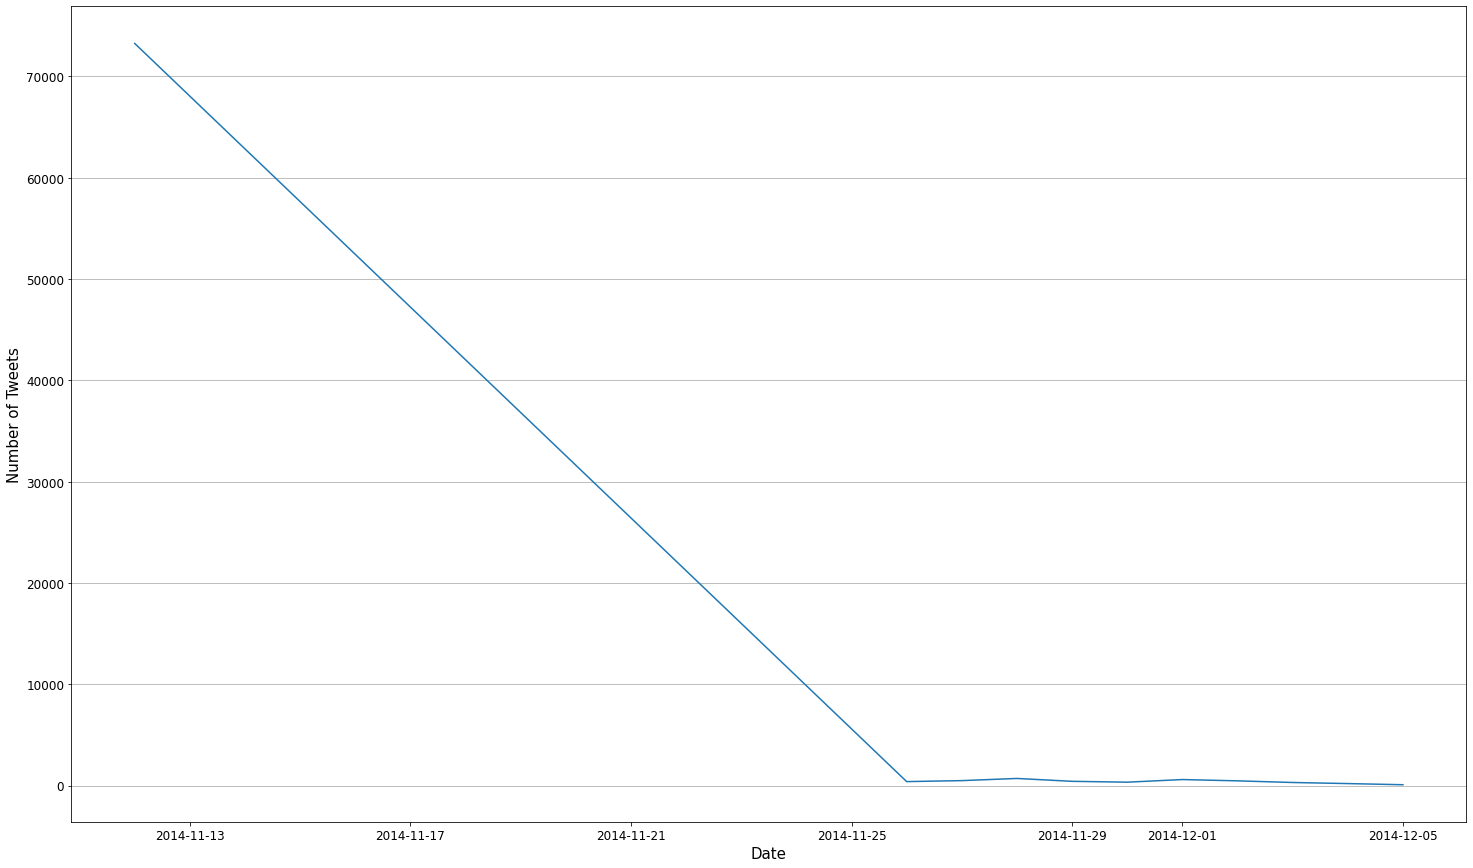

In [13]:
df.sort_values(by='time', ascending=True)
df['time']=pd.to_datetime(df['time'], dayfirst=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of Tweets", fontsize=15)
df['time'].dt.date.value_counts().plot(figsize=(25,15))
plt.grid(axis = 'y')
plt.show()

Once again, let's get a better look by using a log scale on the y-axis

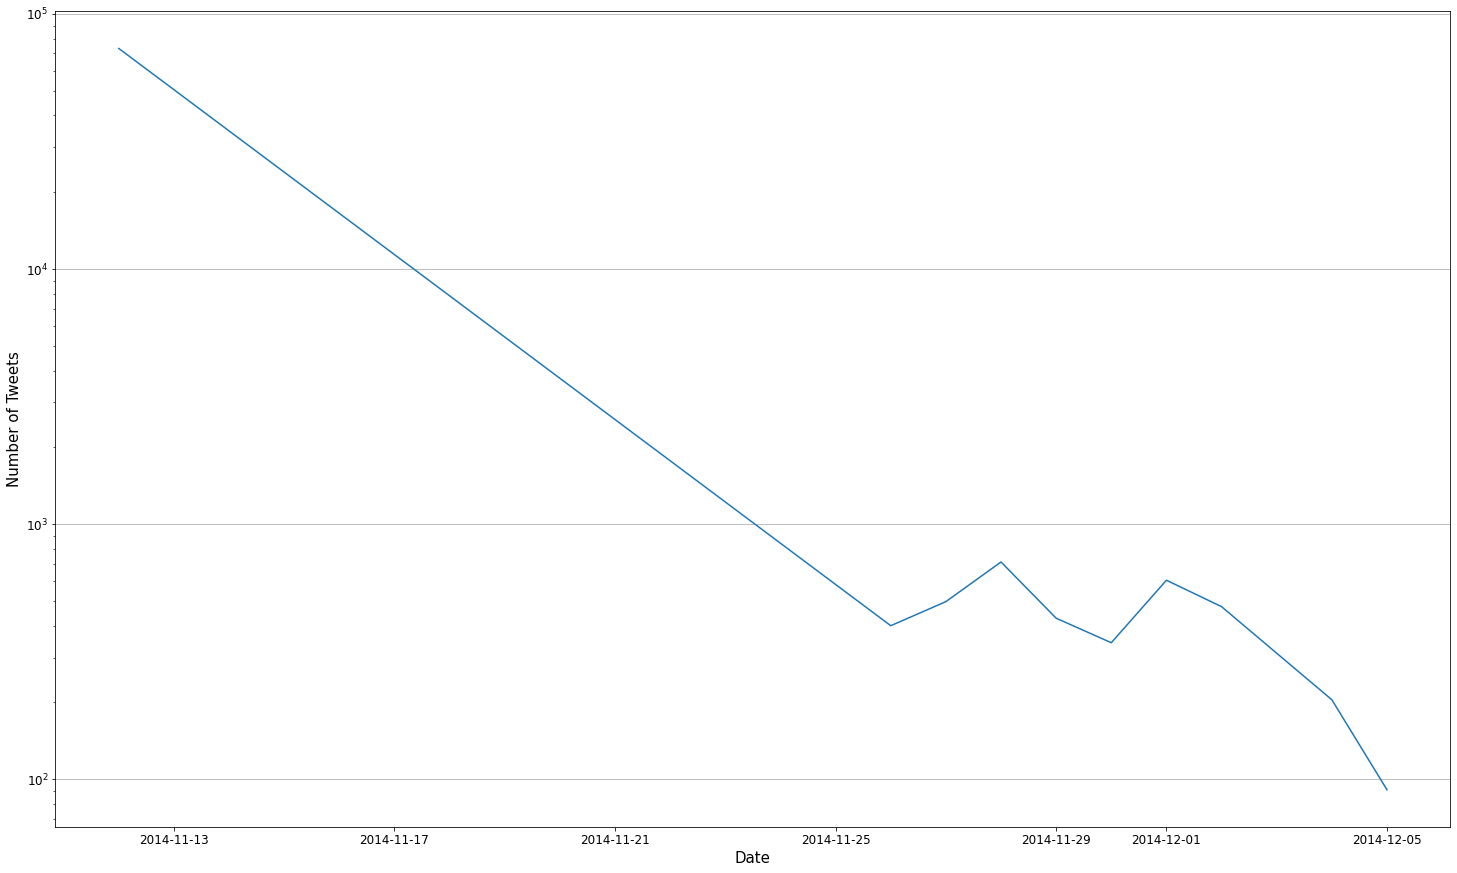

In [14]:
df['time'].dt.date.value_counts().plot(figsize=(25,15), logy=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of Tweets", fontsize=15)
plt.grid(axis = 'y')
plt.show()

Check number of different (unique) users

In [15]:
# https://stackoverflow.com/questions/36106490/how-to-get-unique-values-from-multiple-columns-in-a-pandas-groupby
# By Yaakov Bressler (Last accessed date: 08-04-2022)
users=df.groupby(df['from_user_id_str']).agg(['unique'])
unique_users = len(users.index)

Number of replies

In [16]:
df_replies=df[['in_reply_to_user_id_str', 'in_reply_to_screen_name']]
df_replies=df_replies.dropna(subset=['in_reply_to_user_id_str', 'in_reply_to_screen_name'], how='all')

In [17]:
len(df_replies.index)

1725

Lets have a look at what languages the tweets are in:

In [18]:
#Only display languages that appear frequently, lets say more than 400 times.
df2 = df.groupby('user_lang').filter(lambda x : len(x)<400)
lst = df2['user_lang'].tolist()
lst = list(dict.fromkeys(lst))
lst
for ln in lst:
    df['user_lang'].replace(ln, 'other', inplace=True)

In [19]:
lang=df.groupby(df['user_lang'])

In [20]:
lang.size()

user_lang
ar         428
de        2917
en       52359
en-gb     1972
es        7544
fr        3315
it        2665
ja        1514
nl         838
other     1703
pt         508
ru         794
tr         761
dtype: int64

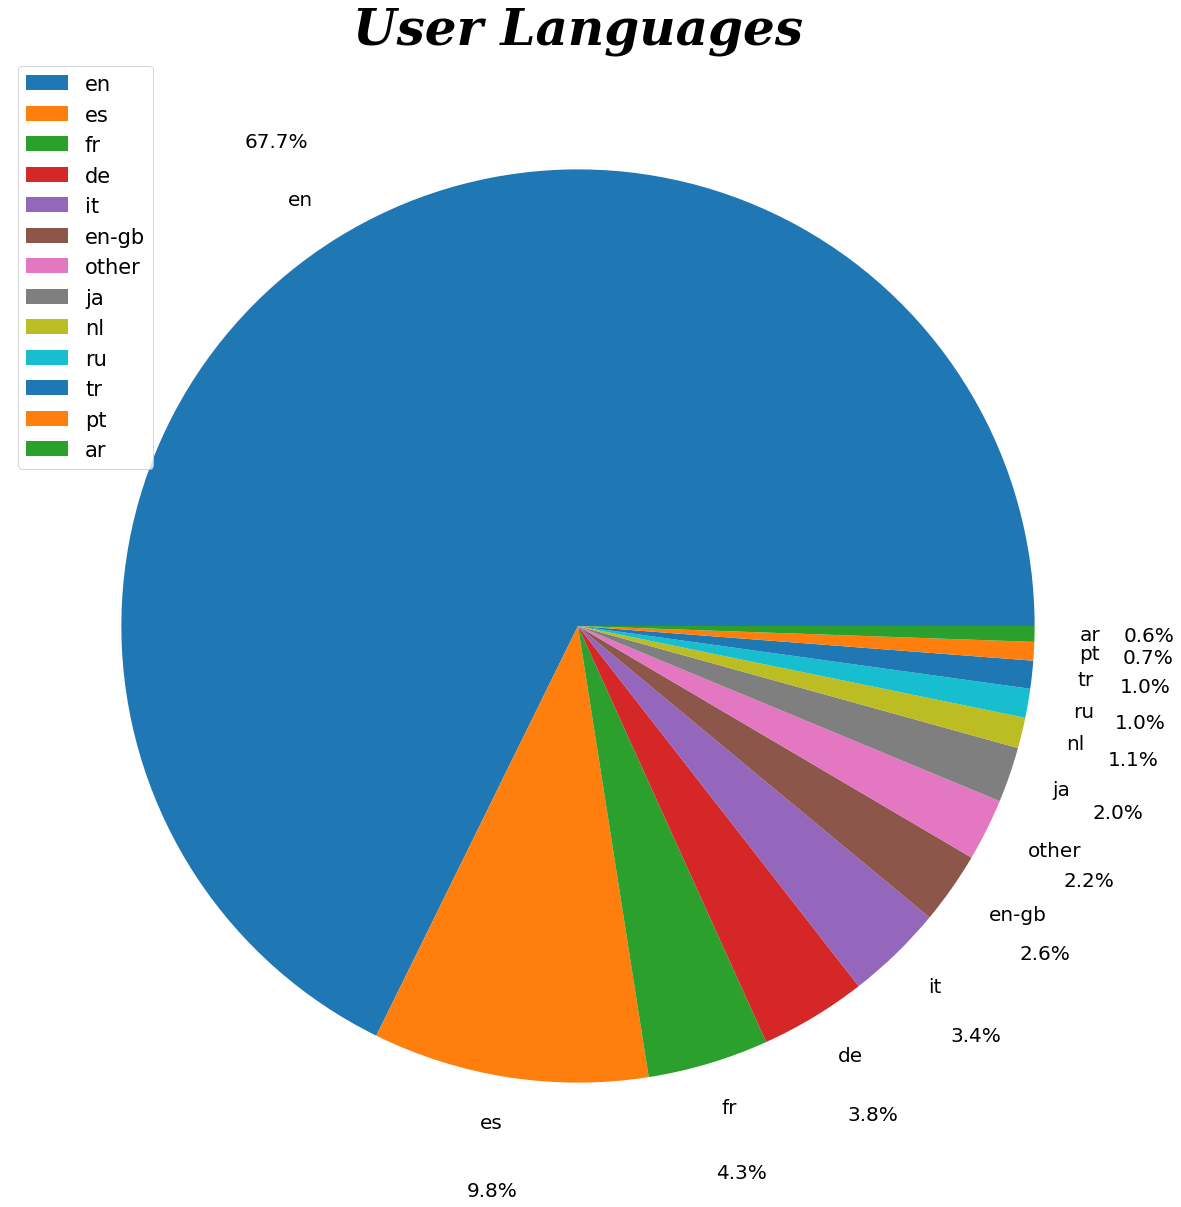

In [21]:
csfont = {'fontname':'Serif'}
df['user_lang'].value_counts().plot(kind="pie", figsize=(21,21), fontsize=20, autopct='%1.1f%%', pctdistance=1.25)
plt.xlabel("")
plt.ylabel("")
plt.title(label="User Languages", fontsize=50, fontstyle="italic", **csfont, fontweight="bold")
plt.legend(loc='upper left',fontsize=21)
plt.show()

We can also determine the frequency of hashtags

In [22]:
import json
import re
df = pd.read_csv("../data/CometLandingRefined.csv")['entities_str']
df.reset_index()

,index,entities_str
0,0,"{""hashtags"":[{""text"":""Philae"",""indices"":[49,56..."
1,1,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
2,2,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
3,3,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
4,4,"{""hashtags"":[{""text"":""MiniMansbridge"",""indices..."
...,...,...
77047,77047,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77048,77048,"{""hashtags"":[{""text"":""cometlanding"",""indices"":..."
77049,77049,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."
77050,77050,"{""hashtags"":[{""text"":""CometLanding"",""indices"":..."


In [23]:
lst = []
for index in range(df.shape[0]):
    results = re.findall(r"{\"text\":\".+\",", str(df.iloc[index]))
    for i in results:
        if(i.startswith('{\"text\":\"') and i.endswith("\",")):
            ents=i.split(",")
            ents=filter(lambda x: "text" in str(x), ents)
            for j in ents:
                lst.append(j)

In [24]:
cleanlst = []
lst=filter(lambda x: "{\"text\":" in str(x), lst)
for i in lst:
    lst2 = i.split(":")
    cleanlst.append(lst2[1].replace("\"", ""))
print('Total number of hashtags: ' + str(len(cleanlst)))

Total number of hashtags: 115113


iterate down the rows
take final column
code that extract and take top 10

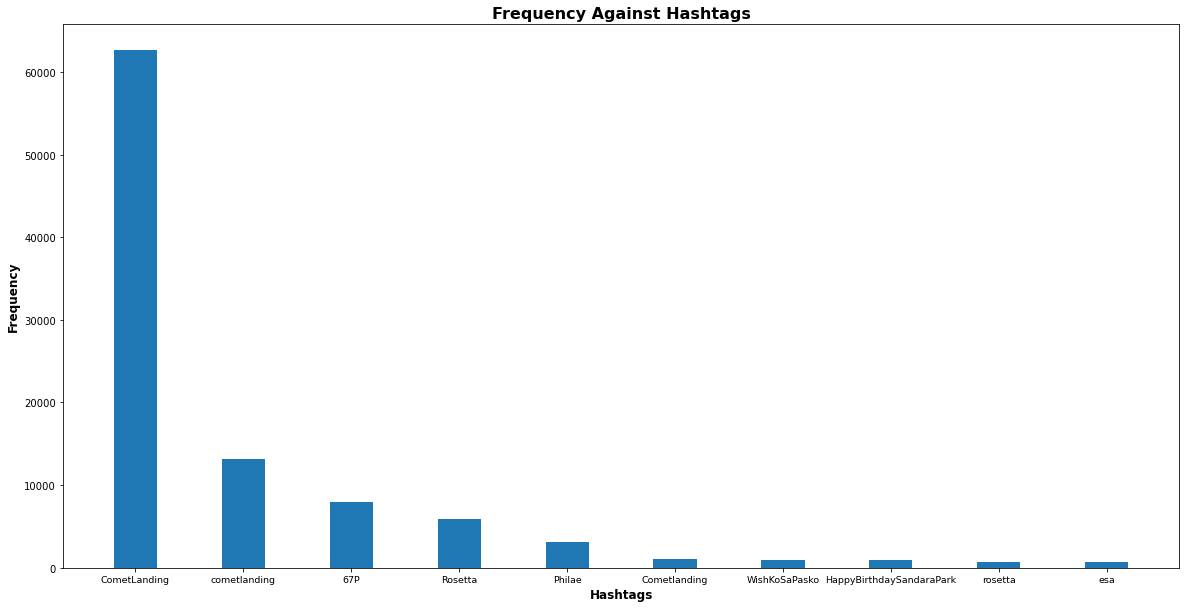

In [25]:
from collections import Counter
from itertools import chain
hashtag_counts=Counter(cleanlst)
plt.figure(figsize=(20,10))
hashtag_plot=plt.bar(*zip(*hashtag_counts.most_common()[:10]), width=0.4) # Getting the top 10 most frequent hashtags
plt.xticks(fontsize=9.5)
plt.xlabel("Hashtags", fontsize=12, fontweight="bold")
plt.ylabel("Frequency", fontsize=12, fontweight="bold")
plt.title("Frequency Against Hashtags", fontsize=16, fontweight="bold")
plt.show()

Just for fun - lets create a wordcloud for hashtag content

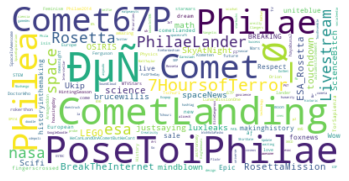

In [26]:
from wordcloud import WordCloud
# removing duplicates from cleanlst
unique_cleanlst = list(dict.fromkeys(cleanlst))
text_for_word_cloud = ' '.join(unique_cleanlst)
word_cloud = WordCloud(collocations=False, background_color='white').generate(text_for_word_cloud)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
df = pd.read_csv("../data/CometLanding.csv")
size_all = len(df)
#Remove all retweets
def retweet(inp):
    if(str(inp).startswith("RT @")):
        return True
    else:
        return False
df=df[df['text'].map(retweet) == False]
num_retweets = size_all - len(df)

In [28]:
num_retweets

59966

In [29]:
df_replies=df[['in_reply_to_user_id_str', 'in_reply_to_screen_name']]
df_replies=df_replies.dropna(subset=['in_reply_to_user_id_str', 'in_reply_to_screen_name'], how='all')
replies = len(df_replies.index)

In [30]:
standard_tweets = len(df) - replies
standard_tweets

15658

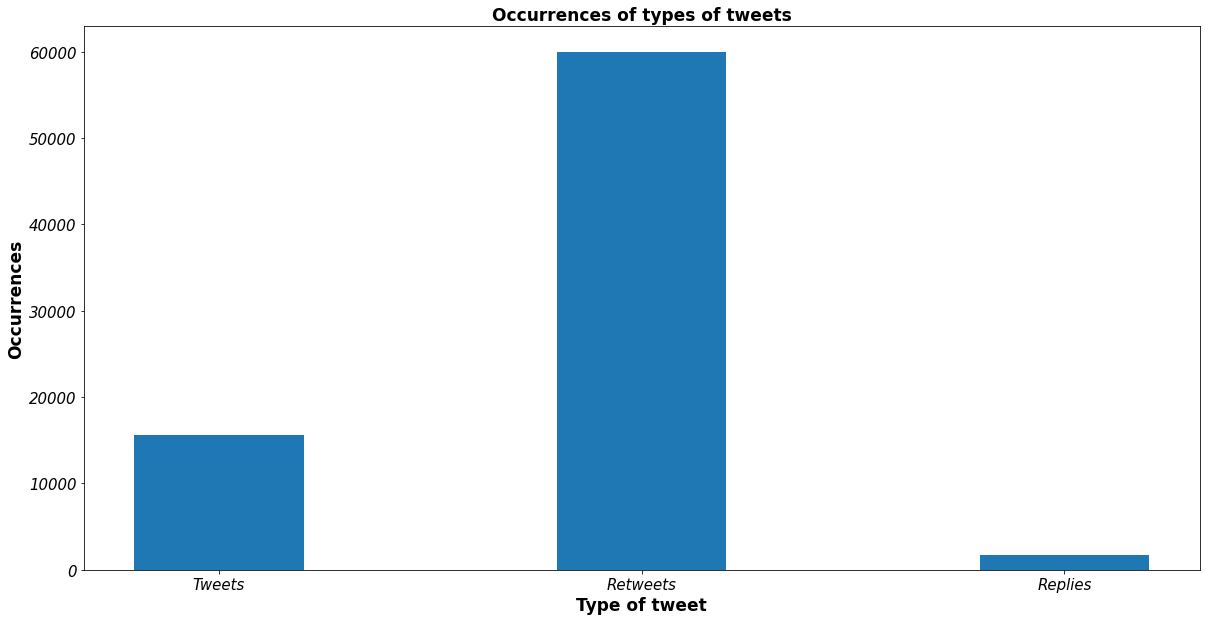

In [31]:
data = {'Tweets':standard_tweets, 'Retweets':num_retweets, 'Replies':replies}
types = list(data.keys())
values = list(data.values())
plt.figure(figsize=(20,10))
plt.bar(types, values, width=0.4)
plt.xticks(fontsize=15, fontstyle='italic')
plt.yticks(fontsize=15, fontstyle='italic')
plt.xlabel('Type of tweet', fontsize=17, fontweight='bold')
plt.ylabel('Occurrences', fontsize=17, fontweight='bold')
plt.title('Occurrences of types of tweets', fontsize=17, fontweight='bold')
plt.show()

In [32]:
print("Average number of tweets per user: " + str(standard_tweets/unique_users))
print("Average number of retweets per user: " + str(num_retweets/unique_users))
print("Average number of replies per user: " + str(replies/unique_users))

print("\nAverage number of tweets of any kind per user: " + str(size_all/unique_users))

Average number of tweets per user: 0.3118129679783336
Average number of retweets per user: 1.1941612235144177
Average number of replies per user: 0.033754181934044926

Average number of tweets of any kind per user: 1.5397283734267961
